In [1]:
!pip install kaggle
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification
!unzip traffic-sign-dataset-classification.zip -d traffic_sign_dataset


Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/26/026_0001.png  
  inflating: traf

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define paths
train_dir = 'traffic_sign_dataset/traffic_Data/DATA'
test_dir = 'traffic_sign_dataset/traffic_Data/TEST'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)




Found 4170 images belonging to 58 classes.


In [10]:
input_shape = (64, 64, 3)
num_classes = 58  # Assuming there are 58 classes

inputs = Input(shape=input_shape)

# First Convolutional Layer
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
conv1_output = x
x = MaxPooling2D((2, 2), name='pool1')(x)
pool1_output = x

# Second Convolutional Layer
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2')(x)
conv2_output = x
x = MaxPooling2D((2, 2), name='pool2')(x)
pool2_output = x

# Third Convolutional Layer
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3')(x)
conv3_output = x
x = MaxPooling2D((2, 2), name='pool3')(x)
pool3_output = x

# Fully Connected Layer
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create Model
model = Model(inputs=inputs, outputs=outputs)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 58)                  │          29,754 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,317,818 (16.47 MB)

 Trainable params: 4,317,818 (16.47 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)




Found 4170 images belonging to 58 classes.


In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3118 - loss: 2.8071

ValueError: Must provide at least one structure

In [12]:
import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

In [13]:
batch_size = 50
image_height = 150
image_width = 150

In [19]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/traffic_sign_dataset/traffic_Data/DATA',
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (image_height, image_width),
    batch_size=batch_size
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [23]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (image_height, image_width),
    batch_size=batch_size

)

Found 4170 files belonging to 58 classes.
Using 834 files for validation.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [22]:
class_name = training_ds.class_names

class_name

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

In [24]:
model = models.Sequential([
 layers.Rescaling(1./255, input_shape=(image_height, image_width,3)),
layers.Conv2D(20,3,activation = 'relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(len(class_name), activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

epochs = 20

history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 20)          │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,658,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 58)                  │           3,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671,054 (6.37 MB)

 Trainable params: 1,671,054 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.1948 - loss: 3.3817 - val_accuracy: 0.5300 - val_loss: 1.8881
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.6546 - loss: 1.3686 - val_accuracy: 0.7926 - val_loss: 0.8268
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8590 - loss: 0.5275 - val_accuracy: 0.8249 - val_loss: 0.5838
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9189 - loss: 0.2976 - val_accuracy: 0.9257 - val_loss: 0.2915
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.9712 - loss: 0.1239 - val_accuracy: 0.9269 - val_loss: 0.2733
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9816 - loss: 0.0683 - val_accuracy: 0.9592 - val_loss: 0.1429
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9960 - loss: 0.0225 - val_accuracy: 0.9676 - val_loss: 0.1099
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9997 - loss: 0.0087 - val_accuracy: 0.97

In [56]:
model.save_weights('model.weights.h5')

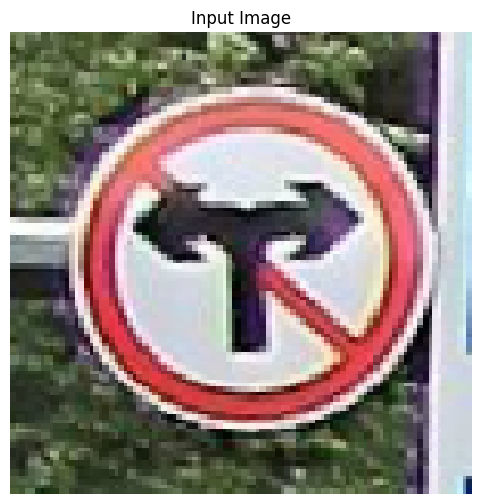

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Traffic Sign: 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


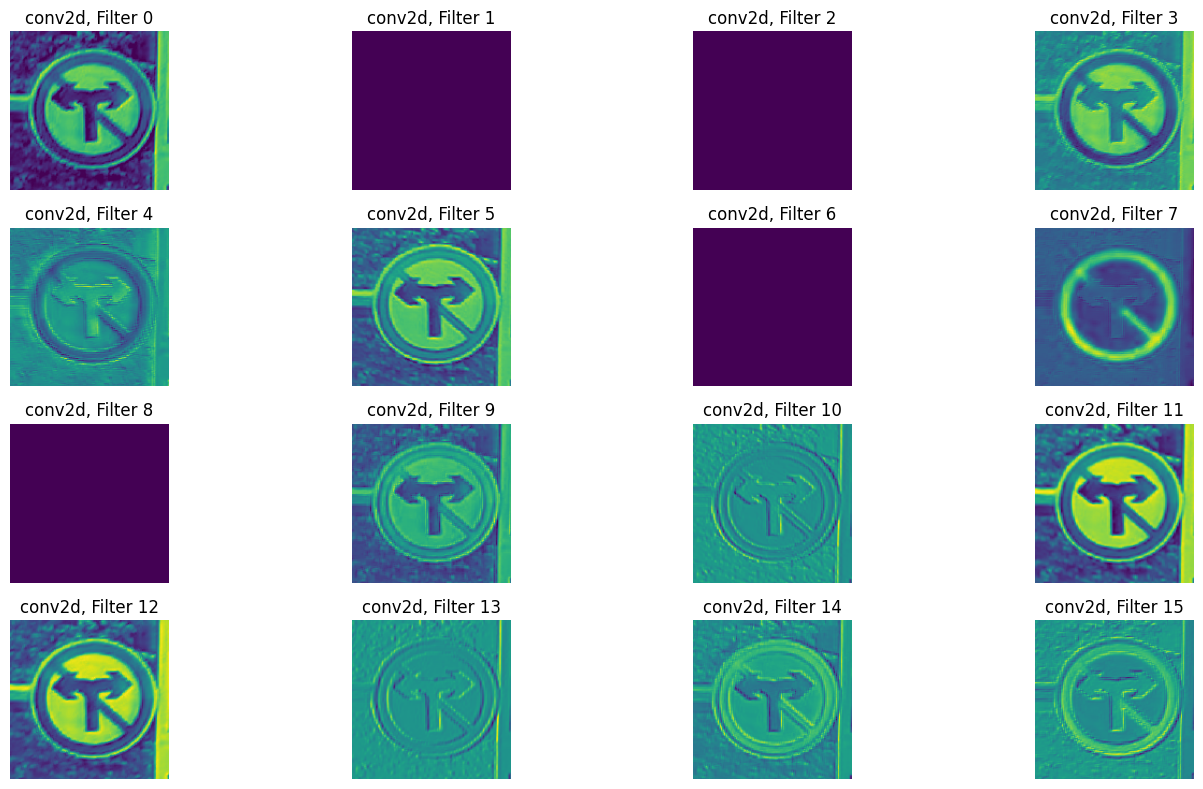

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


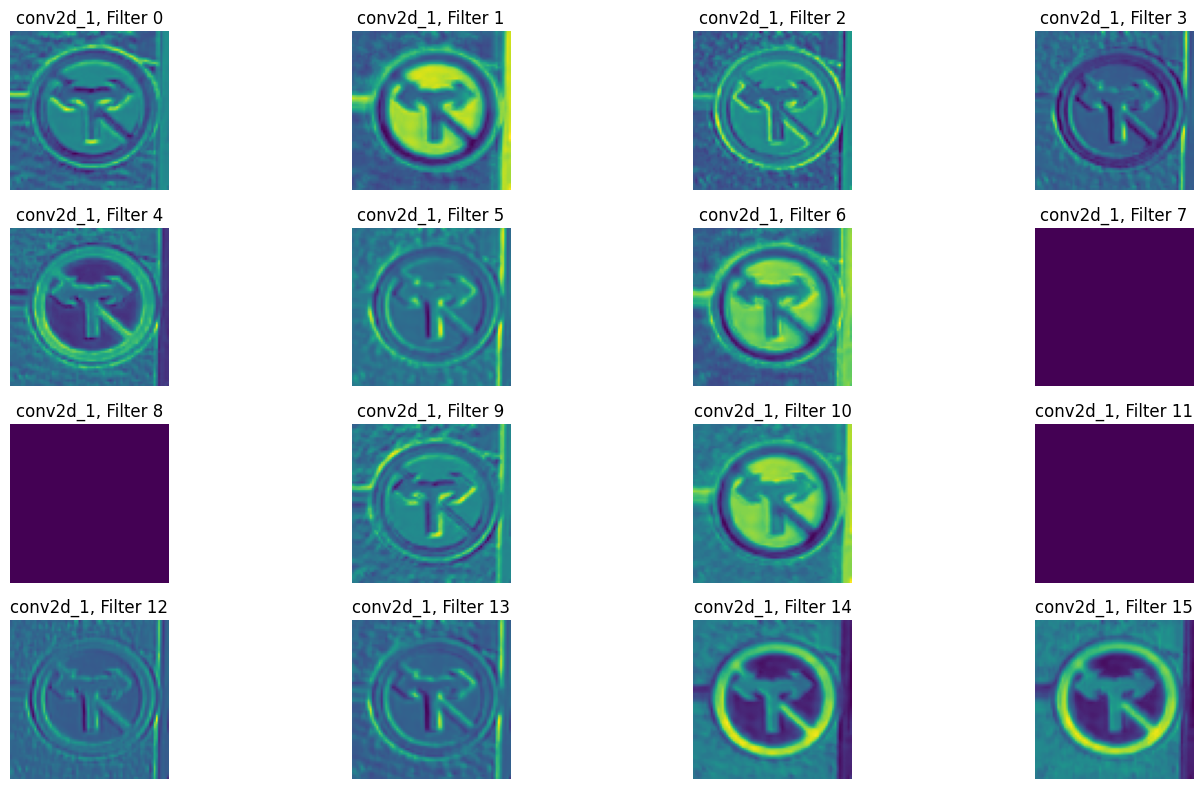

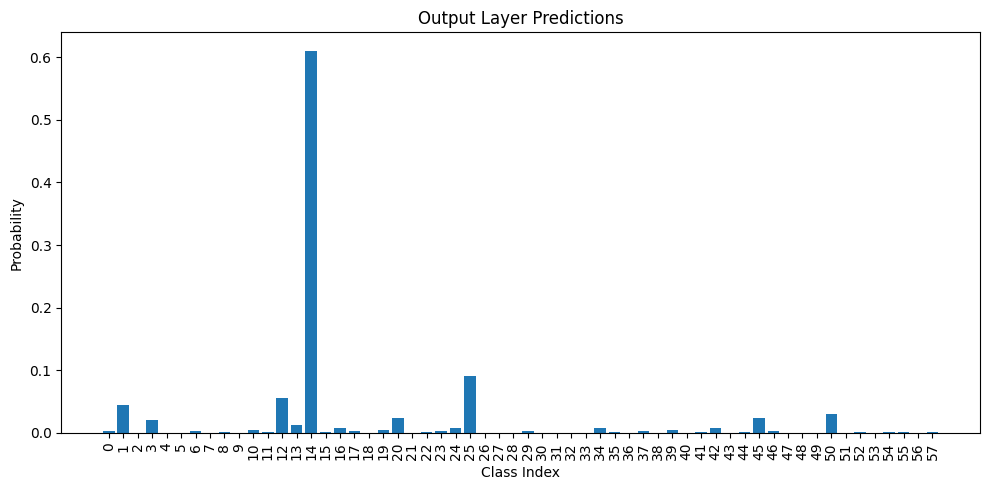

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_and_visualize_traffic_sign(image_path, model, class_names):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Visualize the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_sign = class_names[predicted_class]
    print("Predicted Traffic Sign:", predicted_sign)

    # Visualize feature maps
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Create a new model that outputs the current layer's activations
            temp_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
            activations = temp_model.predict(img_array)

            # Plot feature maps
            plt.figure(figsize=(15, 8))
            for i in range(min(16, activations.shape[-1])):  # Display up to 16 feature maps
                plt.subplot(4, 4, i+1)
                plt.imshow(activations[0, :, :, i], cmap='viridis')
                plt.title(f'{layer.name}, Filter {i}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    # Visualize output layer
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(class_names)), predictions[0])
    plt.title("Output Layer Predictions")
    plt.xlabel("Class Index")
    plt.ylabel("Probability")
    plt.xticks(range(len(class_names)), range(len(class_names)), rotation=90)
    plt.tight_layout()
    plt.show()

    return predicted_sign

# Example usage
image_path = '/content/traffic_sign_dataset/traffic_Data/DATA/12/012_0004.png'
predicted_sign = predict_and_visualize_traffic_sign(image_path, model, class_name)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(58, activation='softmax'))  # Assuming 58 classes for traffic signs

    return model

# Create the model
input_shape = (150, 150, 3)
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Load the dataset
batch_size = 50
image_height = 150
image_width = 150

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

# Train the model
history = model.fit(training_ds, validation_data=testing_ds, epochs=10)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 70, 70, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,642 (18.42 MB)

 Trainable params: 4,827,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.1108 - loss: 54.8189 - val_accuracy: 0.4269 - val_loss: 2.5177
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.6032 - loss: 1.7719 - val_accuracy: 0.7818 - val_loss: 0.9529
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.8623 - loss: 0.5709 - val_accuracy: 0.8573 - val_loss: 0.5778
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9520 - loss: 0.2137 - val_accuracy: 0.9341 - val_loss: 0.3246
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9792 - loss: 0.0961 - val_accuracy: 0.9532 - val_loss: 0.2241
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9930 - loss: 0.0506 - val_accuracy: 0.9616 - val_loss: 0.1751
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9992 - loss: 0.0124

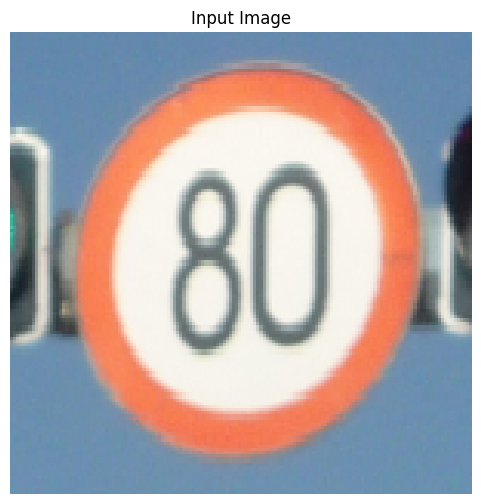

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Traffic Sign: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


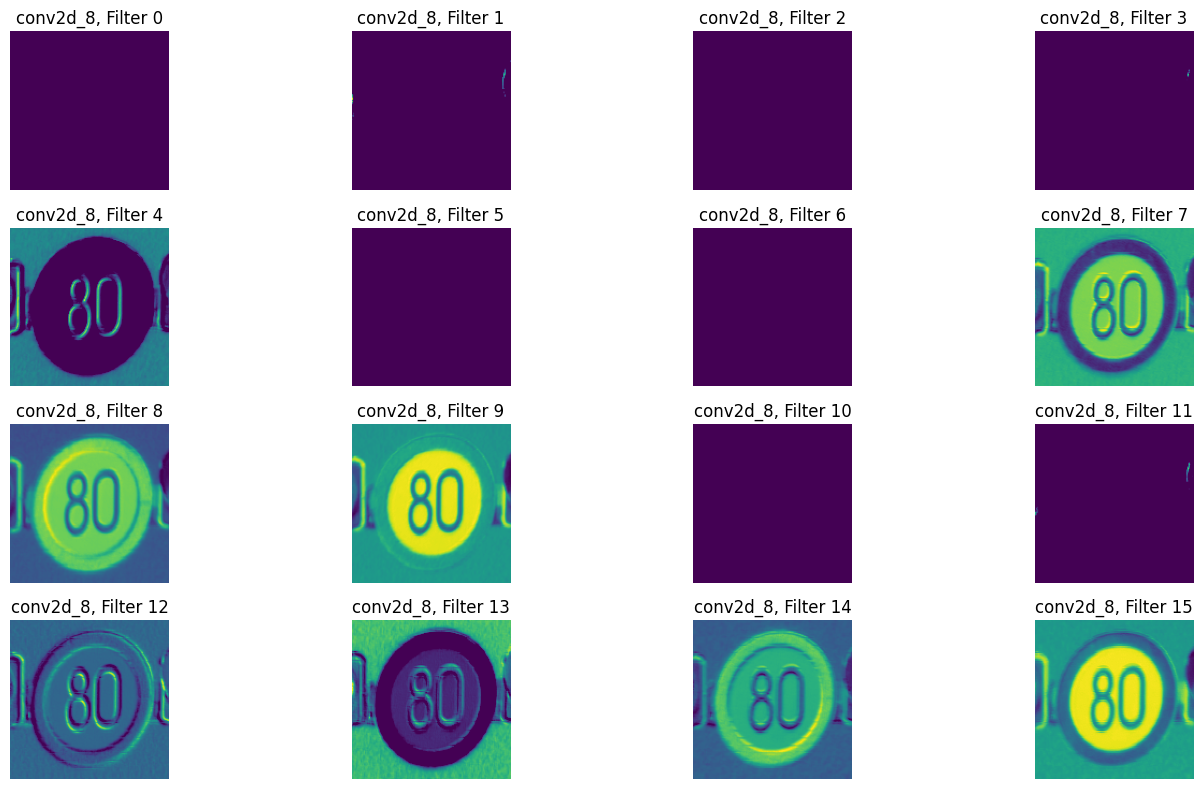

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


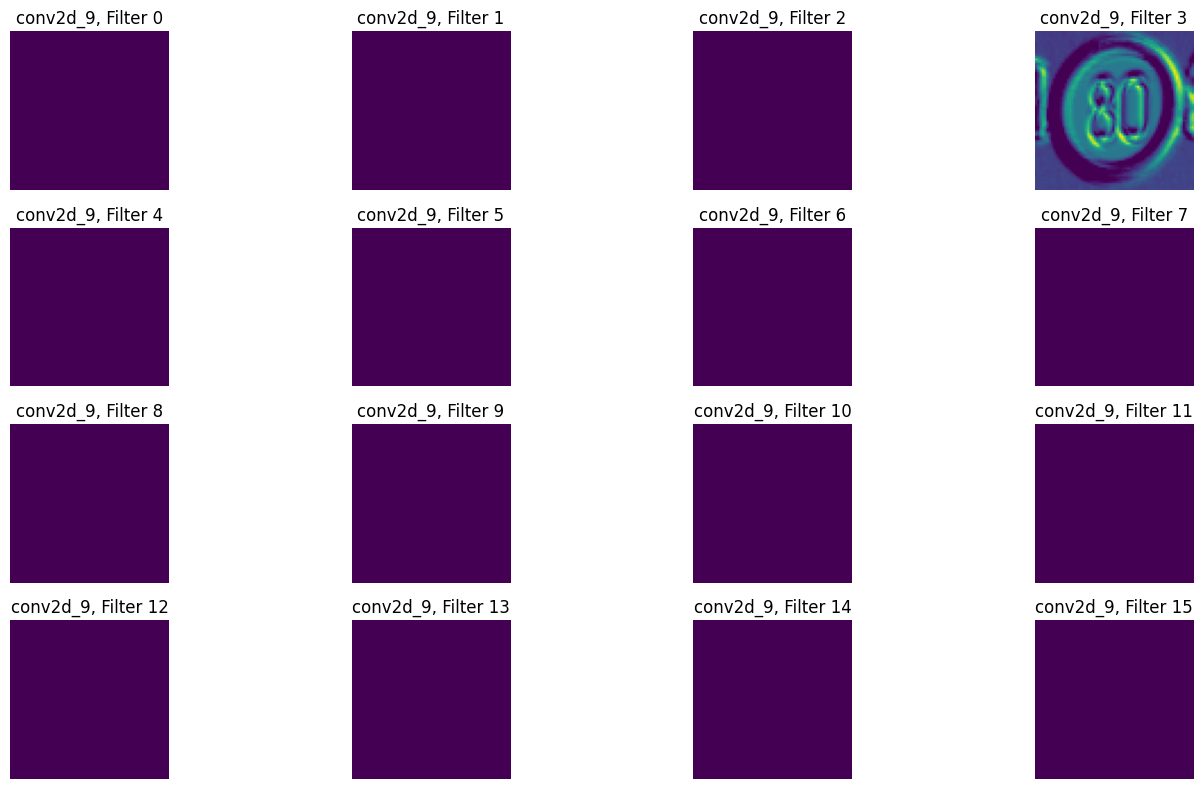

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


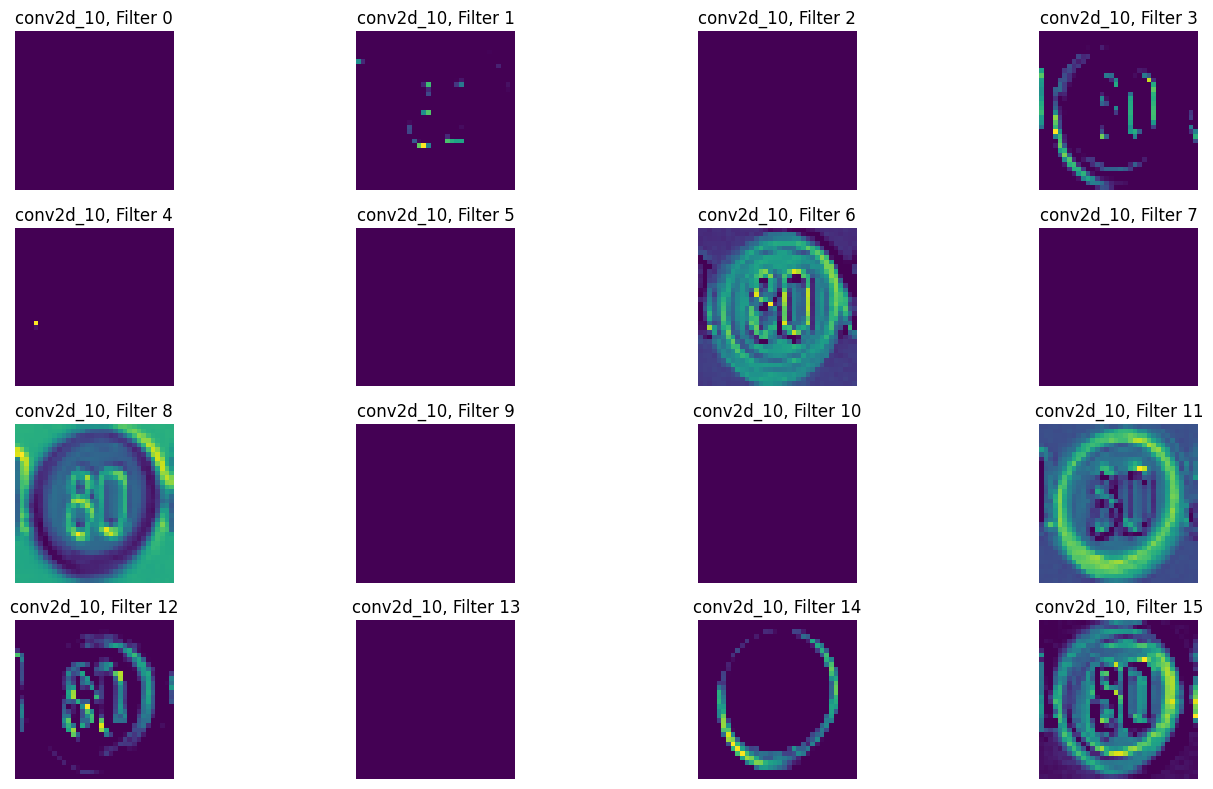

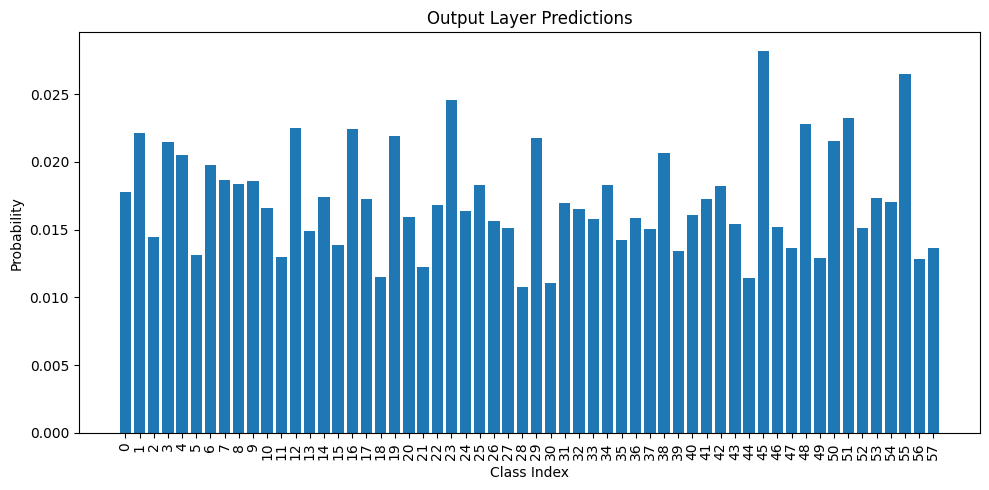

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_and_visualize_traffic_sign(image_path, model, class_names):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Visualize the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_sign = class_names[predicted_class]
    print("Predicted Traffic Sign:", predicted_sign)

    # Visualize feature maps
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Create a new model that outputs the current layer's activations
            temp_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
            activations = temp_model.predict(img_array)

            # Plot feature maps
            plt.figure(figsize=(15, 8))
            for i in range(min(16, activations.shape[-1])):  # Display up to 16 feature maps
                plt.subplot(4, 4, i+1)
                plt.imshow(activations[0, :, :, i], cmap='viridis')
                plt.title(f'{layer.name}, Filter {i}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    # Visualize output layer
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(class_names)), predictions[0])
    plt.title("Output Layer Predictions")
    plt.xlabel("Class Index")
    plt.ylabel("Probability")
    plt.xticks(range(len(class_names)), range(len(class_names)), rotation=90)
    plt.tight_layout()
    plt.show()

    return predicted_sign

# Example usage
image_path = '/content/traffic_sign_dataset/traffic_Data/DATA/7/007_0007.png'
predicted_sign = predict_and_visualize_traffic_sign(image_path, model, class_name)

In [43]:
for images, labels in training_ds.take(1):
    sample_image = images[0:1]
    break
print(labels)
predictions = model.predict(sample_image)
predicted_class = np.argmax(predictions)
print (predicted_class)

tf.Tensor(
[ 8 21  0 21 34 13 22 19 54 54 21 50 25 19 52 38  0 32 24 26  8  0 31 19
 30 29 51 51 45 34 24  8 36 55  6 38 21 25  4  0 45 21 23 21 29 23 30  8
 55 29], shape=(50,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8


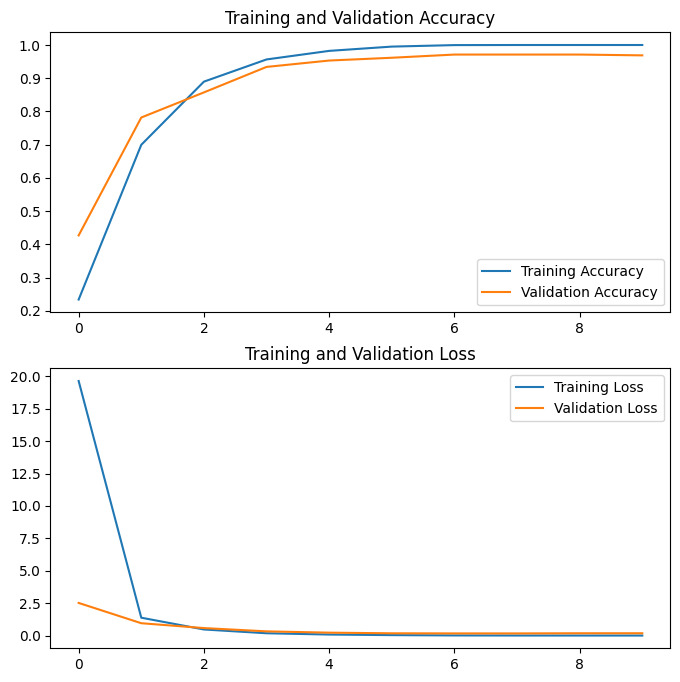

Maximum Validation Accuracy: 0.971222996711731


In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(acc) # Get the number of epochs from the history object

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))